### Importing the important libraries

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Let's load the data 

In [154]:
 # Define the function 
df = pd.read_csv('mymoviedb.csv', lineterminator = '\n' )

### Let's get started with the EDA - Exploratory Data Analysis

In [155]:
#To get the 1st five rows of data to get a idea how the data is

df.head()  #() this is very much important

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [156]:
#lets get some info of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


#### 1. We have a dataframe consisting of 9827 rows and coloumns.
#### 2. The info says that all the data type is correct but the date data type is object this needs to be changed. but we need only year for the analysis so we will remove date and month

In [157]:
#converting the date data type 
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

print(df["Release_Date"].dtypes)


datetime64[ns]


In [158]:
#Keeping only the Year in the date

df["Release_Date"] = df['Release_Date'].dt.year

df['Release_Date'].dtypes

dtype('int32')

In [159]:
#check for the update

df['Release_Date'].head()

0    2021
1    2022
2    2022
3    2021
4    2021
Name: Release_Date, dtype: int32

In [160]:
#Checking the Genre

df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object


#### when we observe the genre there is a gap after every genere mentioned like Action,_Adventure which is white spaces

In [161]:
''' Split the generes into a list and explode the dataframe to have one genere
per row for every movie '''

df['Genre'] = df['Genre'].str.split(', ')

df = df.explode('Genre').reset_index(drop=True)

df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
2,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
3,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Crime,https://image.tmdb.org/t/p/original/74xTEgt7R3...
4,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Mystery,https://image.tmdb.org/t/p/original/74xTEgt7R3...


In [162]:
df['Genre'].dtypes

dtype('O')

#### The Genre need to converted to category

In [163]:
df['Genre'] = df['Genre'].astype('category')

df['Genre'].dtypes
df['Genre'].unique

<bound method Series.unique of 0                 Action
1              Adventure
2        Science Fiction
3                  Crime
4                Mystery
              ...       
25788              Drama
25789            History
25790                War
25791              Drama
25792    Science Fiction
Name: Genre, Length: 25793, dtype: category
Categories (19, object): ['Action', 'Adventure', 'Animation', 'Comedy', ..., 'TV Movie', 'Thriller', 'War', 'Western']>

In [164]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
2,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
3,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Crime,https://image.tmdb.org/t/p/original/74xTEgt7R3...
4,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Mystery,https://image.tmdb.org/t/p/original/74xTEgt7R3...


### check the duplicates

In [165]:
#check the duplicates
df.duplicated().sum()

np.int64(0)

#### No Duplicates

In [166]:
# Doing a basic statstics to get a average of vote count etc

df.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average
count,25793.000000,25793.000000,25793.000000,25793.000000
mean,2006.016322,42.001288,1504.824526,6.475749
std,15.490972,113.341050,2743.009590,1.091296
min,1902.000000,13.354000,0.000000,0.000000
25%,2000.000000,16.366000,166.000000,6.000000
50%,2011.000000,21.865000,490.000000,6.600000
75%,2017.000000,36.503000,1501.000000,7.200000
max,2024.000000,5083.954000,31077.000000,10.000000


#### Remove the unnecessary data here overview, Original language and postal link is not use full 

In [167]:

cols = {'Overview','Original_Language','Poster_Url' }

df.drop(cols, axis = 1, inplace = True)

df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

#### The unnecessary items are removed from the data frame

In [168]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,Crime
4,2022,The Batman,3827.658,1151,8.1,Mystery


#### When we observe the vote average they are in numbers so its no easy to understand the exact meaning so will change them to popular,Average, Below average and Not popular. like that 
#### This is called catagorizing (Catagorizing of vote average coloumn)

In [169]:
def catagorize_coloumn(df, coloumn, labels):

    edges = [df[coloumn].describe()['min'],
              df[coloumn].describe()['25%'],
              df[coloumn].describe()['50%'],
              df[coloumn].describe()['75%'],
              df[coloumn].describe()['max'] ]
    
    df[coloumn] = pd.cut(df[coloumn],edges,labels=labels,duplicates='drop' )
    return df

labels = ['not_Popular','below_average','average','popular']
catagorize_coloumn(df, 'Vote_Average', labels)
df['Vote_Average'].unique()

['popular', 'below_average', 'average', 'not_Popular', NaN]
Categories (4, object): ['not_Popular' < 'below_average' < 'average' < 'popular']

In [170]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [171]:
#checking the total movies per label
df['Vote_Average'].value_counts()


Vote_Average
not_Popular      6999
below_average    6581
average          6432
popular          5540
Name: count, dtype: int64

In [172]:
#Checking if there are any NaN Values in datafarme 
df.isna().sum()

Release_Date      0
Title             0
Popularity        0
Vote_Count        0
Vote_Average    241
Genre             0
dtype: int64

In [173]:
#WE found some NaN in the data lets drop them
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [174]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


### Data Visualization

In [175]:
sns.set_style('whitegrid')

### The most frequent genre of movies released on Netflix?


In [176]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

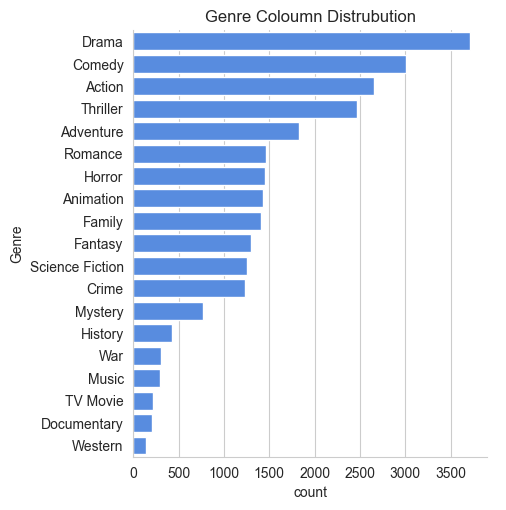

In [177]:
sns.catplot(y='Genre',data=df,kind='count', 
            order = df['Genre'].value_counts().index,
            color = '#4287f5' )
plt.title("Genre Coloumn Distrubution")
plt.show()

### Highest votes in vote avg column

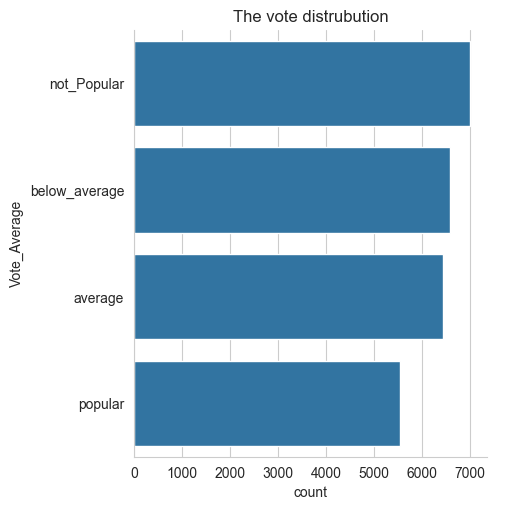

In [178]:
sns.catplot(y = 'Vote_Average',data = df, kind = 'count',
            order=df['Vote_Average'].value_counts().index)
plt.title("The vote distrubution")
plt.show()

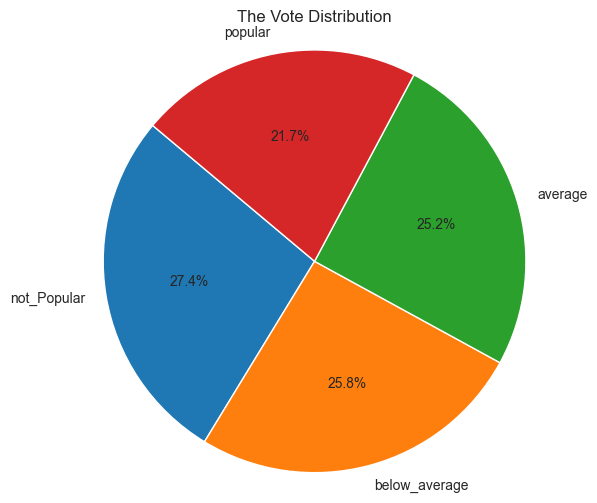

In [179]:

# Step 1: Count the occurrences of each category
vote_counts = df['Vote_Average'].value_counts()

# Step 2: Plot as a pie chart
plt.figure(figsize=(6,6))
plt.pie(vote_counts, labels=vote_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("The Vote Distribution")
plt.axis('equal')  # Ensures the pie is a circle
plt.show()


### The movie to get the highest popularity and its genre


In [180]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


### The movie to get the Lowest popularity and its genre


In [181]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama
25792,1984,Threads,13.354,186,popular,Science Fiction


#### The year in which most film released is

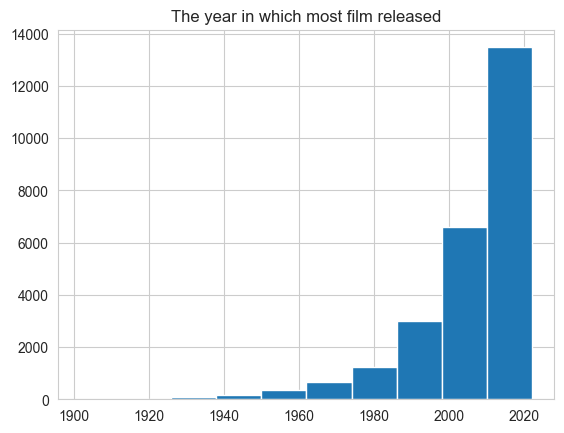

In [182]:
df['Release_Date'].hist()
plt.title("The year in which most film released")
plt.show()